In [ ]:
#Week 4
#SID: 2305603
#Support Vector Classification
#Small C equals large margin, (Where C = Cost function) - Large C equals small margin (inverse relationship)

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


Rows Columns
(569, 31)
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se  area

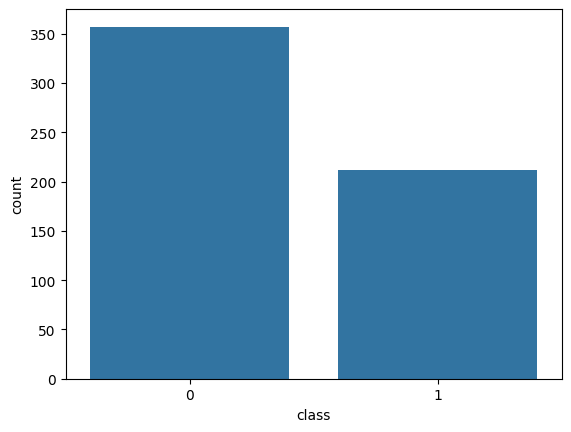

In [ ]:
#Read and Display Data Set

#First, read in CSV and assign it to a variable called "data"
data = pd.read_csv("data/breast_cancer_diagnosis.csv")

#Second, display maximum rows and columns
print('\nRows Columns') #Indicates rows and columns
print(data.shape) #gets the number of rows and columns of data set

pd.set_option('display.max_columns', None) #optional setting to show all feature columns

#Third, display first five rows to check data
print(data.head(5))

#Select last column (assuming the last column is the class)
last_column = data.iloc[:, -1] #using iloc to select the last column

#Count occurences of 0's and 1's
value_counts = last_column.value_counts()

#Print the value counts and check for imbalance
print('\n' , value_counts)

sns.countplot(x="class", data=data)
plt.show()

Axes(0.125,0.11;0.62x0.77)


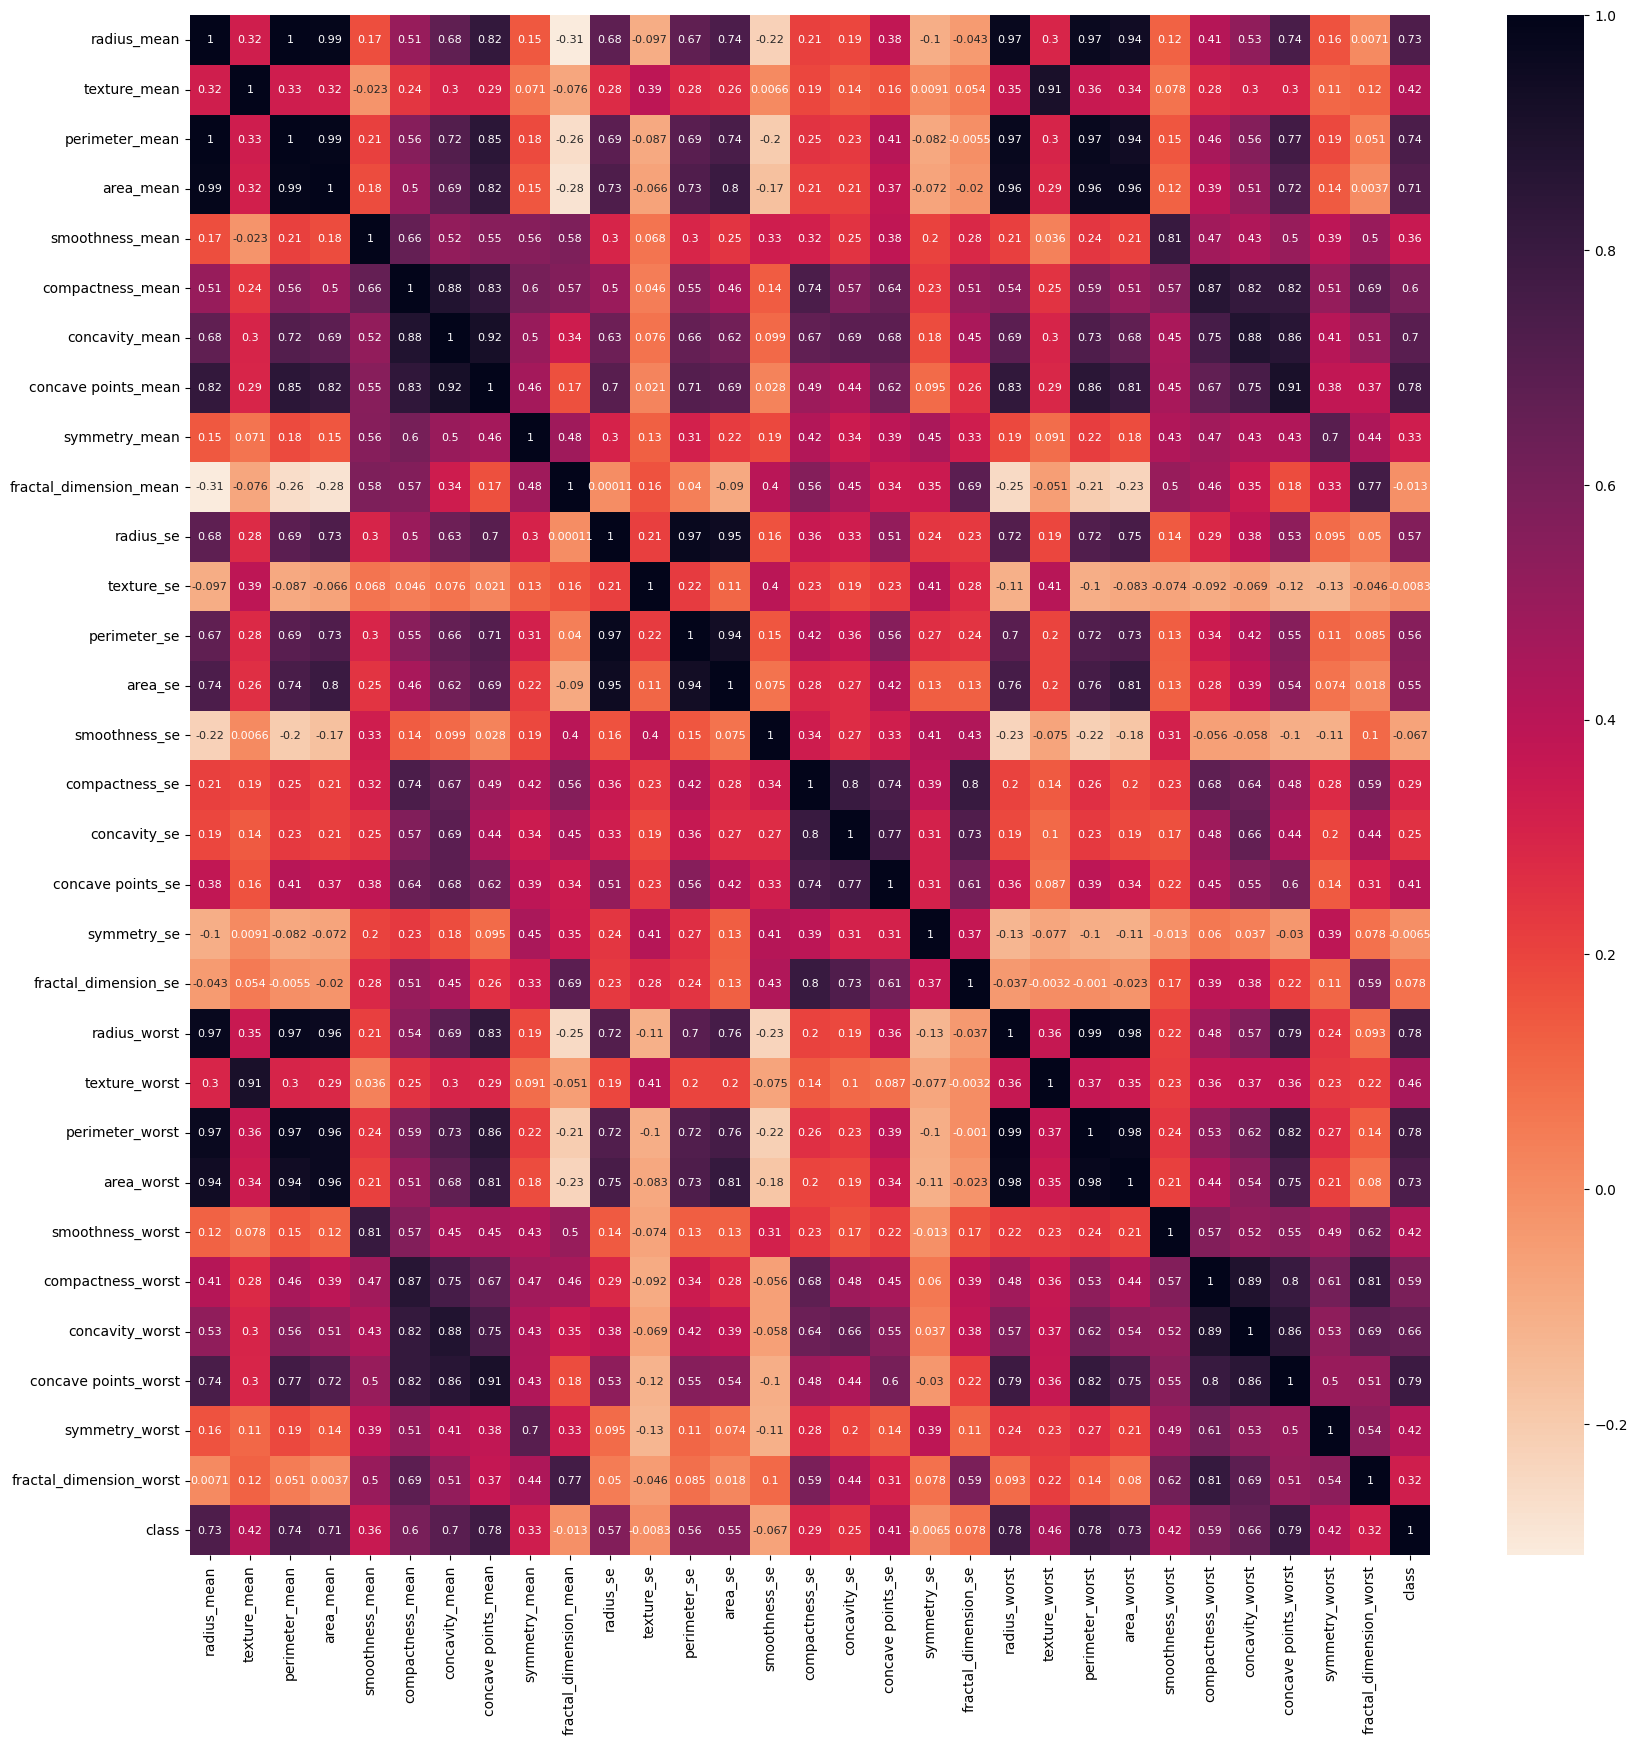

In [ ]:
#Display Feature Relations of Data Set
plt.figure(figsize=(20,20)) #Adjust width and height
print(sns.heatmap(data.corr(),annot=True, annot_kws={"size":8}, cmap= sns.cm.rocket_r))

In [ ]:
#Declare X and Y Variables and Split the Dataset into Train and Test sections
X=data.drop(['class'], axis=1).values #X Variables = all common except the last one

#Declare last column to be the Dependent variable Y
y=data['class'].values #Y Variable = last column

#Split Data Set 70% training and 30% Testing. Initial data shuffle to zero
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3, random_state=0)

In [ ]:
#BAD MODEL NOTED HERE
#Create and Test the Model

#First, declare a new model
#classifier_model = SVC(C=10,gamma=0.01)

#Second, Train (fit) the model from the training data
#classifier_model.fit(X_train, y_train)

#Fourth, Test the model using the testing data
#y_pred = classifier_model.predict(X_test)
#print('\nTest Data Model = ', y_pred)

#Evaluate the Model: Display Confusion Matrix and Performance Metrics
#print('\nConfusion Matrix = \n', confusion_matrix(y_test, y_pred))
#print('\nAccuracy = ', accuracy_score(y_test, y_pred))
#print('\nPrecision = ', precision_score(y_test, y_pred))
#print('\nRecall = ', recall_score(y_test, y_pred))
#print('\nF1 Score = ', f1_score(y_test, y_pred))


Test Data Model =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#Optimising the Model for Better Metrics
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3) #'Verbose' = Added information in Grid Search. 1 = Little, 2 = Average, 3 = Full info
grid.fit(X_train, y_train)
grid.best_params_
grid_predictions = grid.predict(X_test)

#Display Metrics
print('\nConfusion Matrix = \n', confusion_matrix(y_test, grid_predictions))
print('\nAccuracy = ', accuracy_score(y_test, grid_predictions))
print('\nPrecision = ', precision_score(y_test, grid_predictions))
print('\nRecall = ', recall_score(y_test, grid_predictions))
print('\nF1 Score = ', f1_score(y_test, grid_predictions))

#Display best paramaters
print('\nOptimised Parameters = ')
print(grid.best_params_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.620 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.620 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.625 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01